In [1]:
# XGBoost 단점 -> 느리다 (GBM 보다는 빠르지만, 여러 하이퍼파라미터의 조합을 튜닝하기엔 여전히 느리다)

# LightGBM -> 리프 중심 트리 분할 방식
# 리프 중심 트리 분할 방식 : 불균형 트리 분할(학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 한다)
import lightgbm

print(lightgbm.__version__)

3.2.1


In [2]:
# 위스콘신 유방암 데이터 분류 예측

# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [4]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9905


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

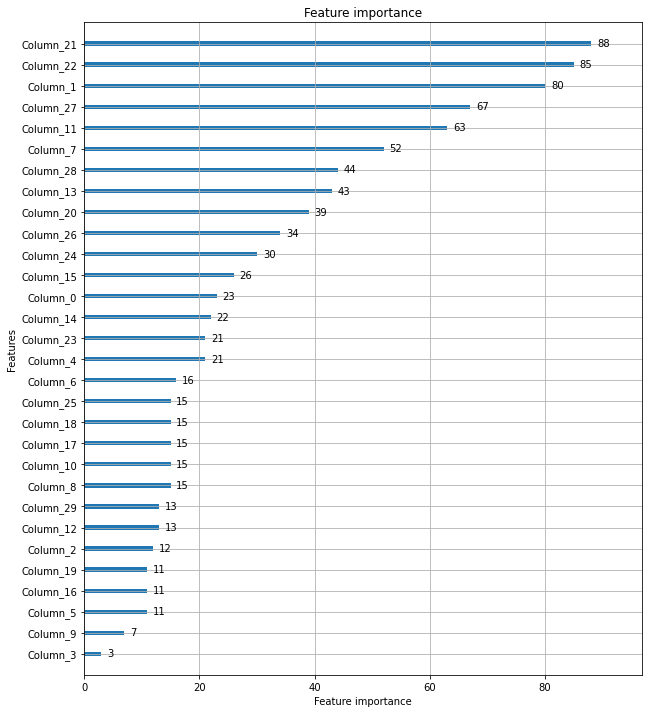

In [5]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

flg, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

In [6]:
# feautre importance 27보다 높은 컬럼 선택
selected = (lgbm_wrapper.feature_importances_ > 16)
index_for_selection = np.array(range(len(selected)))
selected_column_index = index_for_selection[selected]

# 선택된 컬럼만 활용
X_train_selected = pd.DataFrame(X_train).iloc[:,selected_column_index]
X_test_selected = pd.DataFrame(X_test).iloc[:,selected_column_index]

In [7]:
# 선택된 데이터로
lgbm_wrapper = LGBMClassifier(n_esimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train_selected, y_train, early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test_selected)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, preds, pred_proba)

[LightGBM] [Warning] Unknown parameter: n_esimators
[1]	valid_0's binary_logloss: 0.627922
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.625735
[3]	valid_0's binary_logloss: 0.621102
[4]	valid_0's binary_logloss: 0.620469
[5]	valid_0's binary_logloss: 0.621782
[6]	valid_0's binary_logloss: 0.619752
[7]	valid_0's binary_logloss: 0.626967
[8]	valid_0's binary_logloss: 0.627184
[9]	valid_0's binary_logloss: 0.632151
[10]	valid_0's binary_logloss: 0.641641
[11]	valid_0's binary_logloss: 0.646909
[12]	valid_0's binary_logloss: 0.66113
[13]	valid_0's binary_logloss: 0.676918
[14]	valid_0's binary_logloss: 0.679252
[15]	valid_0's binary_logloss: 0.691837
[16]	valid_0's binary_logloss: 0.711252
[17]	valid_0's binary_logloss: 0.711591
[18]	valid_0's binary_logloss: 0.724984
[19]	valid_0's binary_logloss: 0.738379
[20]	valid_0's binary_logloss: 0.730338
[21]	valid_0's binary_logloss: 0.73575
[22]	valid_0's binary_logloss: 0.757931
[23]	valid_0's bi

ValueError: Number of features of the model must match the input. Model n_features_ is 16 and input n_features is 30 

In [6]:
# 산탄데르 고객 만족 예측

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [7]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [8]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [9]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [10]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

# 피처 세트와 레이블 세트분리, 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 hsape:{0}'.format(X_features.shape))

피처 데이터 hsape:(76020, 369)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0, stratify=y_labels)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960438
1    0.039562
Name: TARGET, dtype: float64
테스트 세트 레이블 값 분포 비율
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train), (X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.806131	validation_1-auc:0.778639
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.811867	validation_1-auc:0.784901
[2]	validation_0-auc:0.81454	validation_1-auc:0.788032
[3]	validation_0-auc:0.816373	validation_1-auc:0.790142
[4]	validation_0-auc:0.817591	validation_1-auc:0.791164
[5]	validation_0-auc:0.821018	validation_1-auc:0.794698
[6]	validation_0-auc:0.822843	validation_1-auc:0.796272
[7]	validation_0-auc:0.824045	validation_1-auc:0.796976
[8]	validation_0-auc:0.823207	validation_1-auc:0.796625
[9]	validation_0-auc:0.822984	validation_1-auc:0.796541
[10]	validation_0-auc:0.821323	validation_1-auc:0.795906
[11]	validation_0-auc:0.823286	validation_1-auc:0.796844
[12]	validation_0-auc:0.824967	validation_1-auc:0.79843
[13]	validation_0-auc:0.823987	validation_1-auc:0.797144
[14]	validation_0-auc:0.825334	validation_1-auc:0.798617

[141]	validation_0-auc:0.865204	validation_1-auc:0.824012
[142]	validation_0-auc:0.865296	validation_1-auc:0.824098
[143]	validation_0-auc:0.865413	validation_1-auc:0.824031
[144]	validation_0-auc:0.865482	validation_1-auc:0.824067
[145]	validation_0-auc:0.865664	validation_1-auc:0.823951
[146]	validation_0-auc:0.865727	validation_1-auc:0.823939
[147]	validation_0-auc:0.865977	validation_1-auc:0.823965
[148]	validation_0-auc:0.86606	validation_1-auc:0.823847
[149]	validation_0-auc:0.866117	validation_1-auc:0.823899
[150]	validation_0-auc:0.866148	validation_1-auc:0.823896
[151]	validation_0-auc:0.866232	validation_1-auc:0.823841
[152]	validation_0-auc:0.866293	validation_1-auc:0.823723
[153]	validation_0-auc:0.866364	validation_1-auc:0.823744
[154]	validation_0-auc:0.866578	validation_1-auc:0.823682
[155]	validation_0-auc:0.8667	validation_1-auc:0.823632
[156]	validation_0-auc:0.866765	validation_1-auc:0.823568
[157]	validation_0-auc:0.866973	validation_1-auc:0.823512
[158]	validation_

In [13]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_esimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test,y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_)
      
xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))      

[0]	validation_0-auc:0.720655	validation_1-auc:0.691027
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.818365	validation_1-auc:0.786333
[2]	validation_0-auc:0.810289	validation_1-auc:0.779506
[3]	validation_0-auc:0.81983	validation_1-auc:0.788427
[4]	validation_0-auc:0.825581	validation_1-auc:0.792933
[5]	validation_0-auc:0.823189	validation_1-auc:0.790496
[6]	validation_0-auc:0.821652	validation_1-auc:0.789089
[7]	validation_0-auc:0.829111	validation_1-auc:0.796181
[8]	validation_0-auc:0.832907	validation_1-auc:0.801315
[9]	validation_0-auc:0.832609	validation_1-auc:0.798545
[10]	validation_0-auc:0.837461	validation_1-auc:0.80307
[11]	validation_0-auc:0.841006	validation_1-auc:0.805791
[12]	validation_0-auc:0.842523	validation_1-auc:0.807897
[13]	validation_0-auc:0.842649	validation_1-auc:0.808051
[14]	validation_0-auc:0.842022	validation_1-auc:0.806522


[40]	validation_0-auc:0.860616	validation_1-auc:0.816071
[41]	validation_0-auc:0.860798	validation_1-auc:0.815822
[42]	validation_0-auc:0.862028	validation_1-auc:0.816945
[43]	validation_0-auc:0.862269	validation_1-auc:0.816688
[44]	validation_0-auc:0.863384	validation_1-auc:0.817125
[45]	validation_0-auc:0.863255	validation_1-auc:0.816002
[46]	validation_0-auc:0.864032	validation_1-auc:0.81749
[47]	validation_0-auc:0.86476	validation_1-auc:0.818366
[48]	validation_0-auc:0.865259	validation_1-auc:0.81837
[49]	validation_0-auc:0.865982	validation_1-auc:0.818243
[50]	validation_0-auc:0.866327	validation_1-auc:0.818245
[51]	validation_0-auc:0.867481	validation_1-auc:0.819436
[52]	validation_0-auc:0.868294	validation_1-auc:0.820131
[53]	validation_0-auc:0.868706	validation_1-auc:0.820722
[54]	validation_0-auc:0.869396	validation_1-auc:0.8209
[55]	validation_0-auc:0.86983	validation_1-auc:0.821348
[56]	validation_0-auc:0.870181	validation_1-auc:0.821504
[57]	validation_0-auc:0.87062	validat

[82]	validation_0-auc:0.874324	validation_1-auc:0.823758
[83]	validation_0-auc:0.87472	validation_1-auc:0.823835
[84]	validation_0-auc:0.875074	validation_1-auc:0.823964
[85]	validation_0-auc:0.875317	validation_1-auc:0.824349
[86]	validation_0-auc:0.875699	validation_1-auc:0.82432
[87]	validation_0-auc:0.875872	validation_1-auc:0.824157
[88]	validation_0-auc:0.876089	validation_1-auc:0.824339
[89]	validation_0-auc:0.876296	validation_1-auc:0.824424
[90]	validation_0-auc:0.8763	validation_1-auc:0.824366
[91]	validation_0-auc:0.876347	validation_1-auc:0.824364
[92]	validation_0-auc:0.876643	validation_1-auc:0.824319
[93]	validation_0-auc:0.876712	validation_1-auc:0.824247
[94]	validation_0-auc:0.876804	validation_1-auc:0.824126
[95]	validation_0-auc:0.876876	validation_1-auc:0.824183
[96]	validation_0-auc:0.877268	validation_1-auc:0.824061
[97]	validation_0-auc:0.877293	validation_1-auc:0.82404
[98]	validation_0-auc:0.87741	validation_1-auc:0.824136
[99]	validation_0-auc:0.877726	valida

[22]	validation_0-auc:0.847735	validation_1-auc:0.810965
[23]	validation_0-auc:0.849645	validation_1-auc:0.814314
[24]	validation_0-auc:0.850516	validation_1-auc:0.815091
[25]	validation_0-auc:0.850753	validation_1-auc:0.813876
[26]	validation_0-auc:0.850689	validation_1-auc:0.812682
[27]	validation_0-auc:0.852562	validation_1-auc:0.814747
[28]	validation_0-auc:0.853776	validation_1-auc:0.815702
[29]	validation_0-auc:0.854102	validation_1-auc:0.815439
[30]	validation_0-auc:0.854851	validation_1-auc:0.816048
[31]	validation_0-auc:0.855952	validation_1-auc:0.816743
[32]	validation_0-auc:0.85587	validation_1-auc:0.816042
[33]	validation_0-auc:0.856153	validation_1-auc:0.815406
[34]	validation_0-auc:0.855808	validation_1-auc:0.814768
[35]	validation_0-auc:0.857178	validation_1-auc:0.816661
[36]	validation_0-auc:0.857967	validation_1-auc:0.817465
[37]	validation_0-auc:0.858056	validation_1-auc:0.817091
[38]	validation_0-auc:0.858145	validation_1-auc:0.81684
[39]	validation_0-auc:0.858199	va

[64]	validation_0-auc:0.869162	validation_1-auc:0.822771
[65]	validation_0-auc:0.869465	validation_1-auc:0.822858
[66]	validation_0-auc:0.869612	validation_1-auc:0.822698
[67]	validation_0-auc:0.869948	validation_1-auc:0.823072
[68]	validation_0-auc:0.8701	validation_1-auc:0.82336
[69]	validation_0-auc:0.87026	validation_1-auc:0.823501
[70]	validation_0-auc:0.870394	validation_1-auc:0.823451
[71]	validation_0-auc:0.870627	validation_1-auc:0.82359
[72]	validation_0-auc:0.870844	validation_1-auc:0.823278
[73]	validation_0-auc:0.871308	validation_1-auc:0.823222
[74]	validation_0-auc:0.871372	validation_1-auc:0.823237
[75]	validation_0-auc:0.871473	validation_1-auc:0.823193
[76]	validation_0-auc:0.871699	validation_1-auc:0.823273
[77]	validation_0-auc:0.872051	validation_1-auc:0.823256
[78]	validation_0-auc:0.872138	validation_1-auc:0.82327
[79]	validation_0-auc:0.872256	validation_1-auc:0.823318
[80]	validation_0-auc:0.87241	validation_1-auc:0.823011
[81]	validation_0-auc:0.872713	validat

[4]	validation_0-auc:0.839136	validation_1-auc:0.802949
[5]	validation_0-auc:0.838857	validation_1-auc:0.799001
[6]	validation_0-auc:0.838945	validation_1-auc:0.795856
[7]	validation_0-auc:0.844744	validation_1-auc:0.802631
[8]	validation_0-auc:0.848771	validation_1-auc:0.806496
[9]	validation_0-auc:0.848273	validation_1-auc:0.805098
[10]	validation_0-auc:0.851728	validation_1-auc:0.808975
[11]	validation_0-auc:0.853785	validation_1-auc:0.810686
[12]	validation_0-auc:0.855659	validation_1-auc:0.811929
[13]	validation_0-auc:0.855234	validation_1-auc:0.810064
[14]	validation_0-auc:0.855474	validation_1-auc:0.808859
[15]	validation_0-auc:0.856744	validation_1-auc:0.811025
[16]	validation_0-auc:0.858538	validation_1-auc:0.8114
[17]	validation_0-auc:0.860151	validation_1-auc:0.812896
[18]	validation_0-auc:0.861117	validation_1-auc:0.814146
[19]	validation_0-auc:0.860887	validation_1-auc:0.811887
[20]	validation_0-auc:0.862193	validation_1-auc:0.812535
[21]	validation_0-auc:0.862595	validati

[46]	validation_0-auc:0.88141	validation_1-auc:0.816184
[47]	validation_0-auc:0.882469	validation_1-auc:0.816764
[48]	validation_0-auc:0.883357	validation_1-auc:0.816224
Stopping. Best iteration:
[18]	validation_0-auc:0.860179	validation_1-auc:0.81747

[0]	validation_0-auc:0.725772	validation_1-auc:0.693408
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.819625	validation_1-auc:0.7827
[2]	validation_0-auc:0.819858	validation_1-auc:0.781352
[3]	validation_0-auc:0.83273	validation_1-auc:0.792342
[4]	validation_0-auc:0.837244	validation_1-auc:0.797017
[5]	validation_0-auc:0.835412	validation_1-auc:0.795782
[6]	validation_0-auc:0.836132	validation_1-auc:0.79701
[7]	validation_0-auc:0.839819	validation_1-auc:0.800976
[8]	validation_0-auc:0.844082	validation_1-auc:0.803023
[9]	validation_0-auc:0.845177	validation_1-auc:0.801744
[10]	validation_0-auc:0.849539	val

[34]	validation_0-auc:0.869755	validation_1-auc:0.813567
[35]	validation_0-auc:0.871633	validation_1-auc:0.814942
[36]	validation_0-auc:0.872832	validation_1-auc:0.816007
[37]	validation_0-auc:0.872863	validation_1-auc:0.815136
[38]	validation_0-auc:0.87304	validation_1-auc:0.815024
[39]	validation_0-auc:0.873521	validation_1-auc:0.814033
[40]	validation_0-auc:0.873857	validation_1-auc:0.813431
[41]	validation_0-auc:0.874025	validation_1-auc:0.813967
[42]	validation_0-auc:0.875155	validation_1-auc:0.815118
[43]	validation_0-auc:0.875447	validation_1-auc:0.814674
[44]	validation_0-auc:0.876609	validation_1-auc:0.815717
[45]	validation_0-auc:0.876742	validation_1-auc:0.814509
[46]	validation_0-auc:0.877691	validation_1-auc:0.815648
[47]	validation_0-auc:0.878213	validation_1-auc:0.81651
[48]	validation_0-auc:0.879016	validation_1-auc:0.816411
[49]	validation_0-auc:0.879689	validation_1-auc:0.815919
[50]	validation_0-auc:0.879748	validation_1-auc:0.815392
[51]	validation_0-auc:0.88071	val

[76]	validation_0-auc:0.888926	validation_1-auc:0.821405
[77]	validation_0-auc:0.88906	validation_1-auc:0.821608
[78]	validation_0-auc:0.889188	validation_1-auc:0.821558
[79]	validation_0-auc:0.8893	validation_1-auc:0.821585
[80]	validation_0-auc:0.88943	validation_1-auc:0.821644
[81]	validation_0-auc:0.889574	validation_1-auc:0.821819
[82]	validation_0-auc:0.889605	validation_1-auc:0.821757
[83]	validation_0-auc:0.889753	validation_1-auc:0.821682
[84]	validation_0-auc:0.889923	validation_1-auc:0.82163
[85]	validation_0-auc:0.890047	validation_1-auc:0.821663
[86]	validation_0-auc:0.890106	validation_1-auc:0.821632
[87]	validation_0-auc:0.890439	validation_1-auc:0.821576
[88]	validation_0-auc:0.890606	validation_1-auc:0.82155
[89]	validation_0-auc:0.890656	validation_1-auc:0.821251
[90]	validation_0-auc:0.891249	validation_1-auc:0.821047
[91]	validation_0-auc:0.891475	validation_1-auc:0.820964
[92]	validation_0-auc:0.891557	validation_1-auc:0.820947
[93]	validation_0-auc:0.891649	valida

[17]	validation_0-auc:0.847153	validation_1-auc:0.812516
[18]	validation_0-auc:0.848427	validation_1-auc:0.814071
[19]	validation_0-auc:0.84847	validation_1-auc:0.812665
[20]	validation_0-auc:0.849974	validation_1-auc:0.813492
[21]	validation_0-auc:0.850415	validation_1-auc:0.813828
[22]	validation_0-auc:0.851509	validation_1-auc:0.814958
[23]	validation_0-auc:0.852086	validation_1-auc:0.816059
[24]	validation_0-auc:0.852985	validation_1-auc:0.816833
[25]	validation_0-auc:0.853559	validation_1-auc:0.81716
[26]	validation_0-auc:0.854742	validation_1-auc:0.818346
[27]	validation_0-auc:0.855643	validation_1-auc:0.819283
[28]	validation_0-auc:0.855867	validation_1-auc:0.819125
[29]	validation_0-auc:0.85672	validation_1-auc:0.818214
[30]	validation_0-auc:0.857426	validation_1-auc:0.81907
[31]	validation_0-auc:0.857572	validation_1-auc:0.819045
[32]	validation_0-auc:0.857845	validation_1-auc:0.819139
[33]	validation_0-auc:0.858642	validation_1-auc:0.819071
[34]	validation_0-auc:0.858753	vali

[66]	validation_0-auc:0.871732	validation_1-auc:0.824314
[67]	validation_0-auc:0.871893	validation_1-auc:0.824148
[68]	validation_0-auc:0.872315	validation_1-auc:0.824392
[69]	validation_0-auc:0.872367	validation_1-auc:0.824333
[70]	validation_0-auc:0.872487	validation_1-auc:0.824244
[71]	validation_0-auc:0.872667	validation_1-auc:0.824263
[72]	validation_0-auc:0.872877	validation_1-auc:0.824233
[73]	validation_0-auc:0.873118	validation_1-auc:0.82416
[74]	validation_0-auc:0.873246	validation_1-auc:0.824228
[75]	validation_0-auc:0.873351	validation_1-auc:0.824173
[76]	validation_0-auc:0.873449	validation_1-auc:0.824038
[77]	validation_0-auc:0.873458	validation_1-auc:0.823922
[78]	validation_0-auc:0.873636	validation_1-auc:0.823931
[79]	validation_0-auc:0.87375	validation_1-auc:0.823997
[80]	validation_0-auc:0.874275	validation_1-auc:0.824016
[81]	validation_0-auc:0.874476	validation_1-auc:0.824027
[82]	validation_0-auc:0.874588	validation_1-auc:0.824063
[83]	validation_0-auc:0.87469	val

[9]	validation_0-auc:0.836284	validation_1-auc:0.804504
[10]	validation_0-auc:0.837506	validation_1-auc:0.805476
[11]	validation_0-auc:0.838269	validation_1-auc:0.806454
[12]	validation_0-auc:0.840038	validation_1-auc:0.808741
[13]	validation_0-auc:0.842441	validation_1-auc:0.808878
[14]	validation_0-auc:0.842342	validation_1-auc:0.808499
[15]	validation_0-auc:0.844794	validation_1-auc:0.810147
[16]	validation_0-auc:0.846739	validation_1-auc:0.813379
[17]	validation_0-auc:0.847488	validation_1-auc:0.814085
[18]	validation_0-auc:0.848224	validation_1-auc:0.815023
[19]	validation_0-auc:0.848146	validation_1-auc:0.81446
[20]	validation_0-auc:0.849657	validation_1-auc:0.815458
[21]	validation_0-auc:0.850024	validation_1-auc:0.81539
[22]	validation_0-auc:0.850983	validation_1-auc:0.816052
[23]	validation_0-auc:0.851624	validation_1-auc:0.817091
[24]	validation_0-auc:0.85228	validation_1-auc:0.817361
[25]	validation_0-auc:0.853221	validation_1-auc:0.817891
[26]	validation_0-auc:0.854058	vali

[62]	validation_0-auc:0.868209	validation_1-auc:0.823649
[63]	validation_0-auc:0.868358	validation_1-auc:0.823573
[64]	validation_0-auc:0.86886	validation_1-auc:0.823867
[65]	validation_0-auc:0.869226	validation_1-auc:0.823864
[66]	validation_0-auc:0.869574	validation_1-auc:0.824083
[67]	validation_0-auc:0.869969	validation_1-auc:0.823974
[68]	validation_0-auc:0.870003	validation_1-auc:0.823889
[69]	validation_0-auc:0.870143	validation_1-auc:0.823866
[70]	validation_0-auc:0.870409	validation_1-auc:0.824059
[71]	validation_0-auc:0.870511	validation_1-auc:0.823972
[72]	validation_0-auc:0.870747	validation_1-auc:0.823798
[73]	validation_0-auc:0.871248	validation_1-auc:0.823529
[74]	validation_0-auc:0.871319	validation_1-auc:0.823504
[75]	validation_0-auc:0.871562	validation_1-auc:0.823363
[76]	validation_0-auc:0.871656	validation_1-auc:0.823248
[77]	validation_0-auc:0.871814	validation_1-auc:0.823211
[78]	validation_0-auc:0.871945	validation_1-auc:0.823041
[79]	validation_0-auc:0.872107	v

[10]	validation_0-auc:0.849068	validation_1-auc:0.810732
[11]	validation_0-auc:0.849842	validation_1-auc:0.811574
[12]	validation_0-auc:0.851321	validation_1-auc:0.812667
[13]	validation_0-auc:0.853732	validation_1-auc:0.811796
[14]	validation_0-auc:0.854165	validation_1-auc:0.811087
[15]	validation_0-auc:0.857047	validation_1-auc:0.813896
[16]	validation_0-auc:0.858489	validation_1-auc:0.81529
[17]	validation_0-auc:0.861407	validation_1-auc:0.81633
[18]	validation_0-auc:0.862143	validation_1-auc:0.817067
[19]	validation_0-auc:0.863657	validation_1-auc:0.815555
[20]	validation_0-auc:0.865419	validation_1-auc:0.816515
[21]	validation_0-auc:0.865957	validation_1-auc:0.815589
[22]	validation_0-auc:0.866745	validation_1-auc:0.816216
[23]	validation_0-auc:0.868004	validation_1-auc:0.817746
[24]	validation_0-auc:0.868833	validation_1-auc:0.81836
[25]	validation_0-auc:0.869868	validation_1-auc:0.81935
[26]	validation_0-auc:0.870659	validation_1-auc:0.820117
[27]	validation_0-auc:0.8718	valida

[74]	validation_0-auc:0.894794	validation_1-auc:0.821616
[75]	validation_0-auc:0.894821	validation_1-auc:0.821691
[76]	validation_0-auc:0.894935	validation_1-auc:0.821542
[77]	validation_0-auc:0.895209	validation_1-auc:0.821247
[78]	validation_0-auc:0.895297	validation_1-auc:0.821128
[79]	validation_0-auc:0.895397	validation_1-auc:0.821085
[80]	validation_0-auc:0.89548	validation_1-auc:0.820942
[81]	validation_0-auc:0.89554	validation_1-auc:0.820877
[82]	validation_0-auc:0.895661	validation_1-auc:0.820619
[83]	validation_0-auc:0.89582	validation_1-auc:0.820329
[84]	validation_0-auc:0.896037	validation_1-auc:0.820187
[85]	validation_0-auc:0.896082	validation_1-auc:0.820127
[86]	validation_0-auc:0.896186	validation_1-auc:0.820028
[87]	validation_0-auc:0.896377	validation_1-auc:0.81983
[88]	validation_0-auc:0.896684	validation_1-auc:0.819586
[89]	validation_0-auc:0.896899	validation_1-auc:0.81967
[90]	validation_0-auc:0.897278	validation_1-auc:0.819342
[91]	validation_0-auc:0.897584	valid

[24]	validation_0-auc:0.866154	validation_1-auc:0.817411
[25]	validation_0-auc:0.867174	validation_1-auc:0.81838
[26]	validation_0-auc:0.867887	validation_1-auc:0.819503
[27]	validation_0-auc:0.868623	validation_1-auc:0.819451
[28]	validation_0-auc:0.869354	validation_1-auc:0.818978
[29]	validation_0-auc:0.870206	validation_1-auc:0.818001
[30]	validation_0-auc:0.871062	validation_1-auc:0.818978
[31]	validation_0-auc:0.871587	validation_1-auc:0.819221
[32]	validation_0-auc:0.872537	validation_1-auc:0.818894
[33]	validation_0-auc:0.873624	validation_1-auc:0.818261
[34]	validation_0-auc:0.87418	validation_1-auc:0.818423
[35]	validation_0-auc:0.874814	validation_1-auc:0.818449
[36]	validation_0-auc:0.875446	validation_1-auc:0.818566
[37]	validation_0-auc:0.876088	validation_1-auc:0.819145
[38]	validation_0-auc:0.876708	validation_1-auc:0.82027
[39]	validation_0-auc:0.877391	validation_1-auc:0.820676
[40]	validation_0-auc:0.878066	validation_1-auc:0.821134
[41]	validation_0-auc:0.878584	val

[82]	validation_0-auc:0.888954	validation_1-auc:0.819767
[83]	validation_0-auc:0.88902	validation_1-auc:0.819703
[84]	validation_0-auc:0.889109	validation_1-auc:0.819619
[85]	validation_0-auc:0.889181	validation_1-auc:0.819728
[86]	validation_0-auc:0.889229	validation_1-auc:0.819666
[87]	validation_0-auc:0.889504	validation_1-auc:0.81959
[88]	validation_0-auc:0.889809	validation_1-auc:0.819444
[89]	validation_0-auc:0.889857	validation_1-auc:0.819397
[90]	validation_0-auc:0.890125	validation_1-auc:0.819211
[91]	validation_0-auc:0.890283	validation_1-auc:0.819098
[92]	validation_0-auc:0.890308	validation_1-auc:0.818939
Stopping. Best iteration:
[62]	validation_0-auc:0.88578	validation_1-auc:0.821121

[0]	validation_0-auc:0.826262	validation_1-auc:0.795702
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.833647	validation_1-auc:0.802769
[2]	validation_0-auc:0.

In [14]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가한다
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                       min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc",eval_set=[(X_train, y_train),(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.827538	validation_1-auc:0.794141
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.830424	validation_1-auc:0.796331
[2]	validation_0-auc:0.83624	validation_1-auc:0.797556
[3]	validation_0-auc:0.84052	validation_1-auc:0.803375
[4]	validation_0-auc:0.842227	validation_1-auc:0.806929
[5]	validation_0-auc:0.842851	validation_1-auc:0.807537
[6]	validation_0-auc:0.845383	validation_1-auc:0.808913
[7]	validation_0-auc:0.845491	validation_1-auc:0.809206
[8]	validation_0-auc:0.847495	validation_1-auc:0.810041
[9]	validation_0-auc:0.846811	validation_1-auc:0.80965
[10]	validation_0-auc:0.848193	validation_1-auc:0.810207
[11]	validation_0-auc:0.84835	validation_1-auc:0.808498
[12]	validation_0-auc:0.849151	validation_1-auc:0.808872
[13]	validation_0-auc:0.849442	validation_1-auc:0.808988
[14]	validation_0-auc:0.851122	validation_1-auc:0.81045
[1

[142]	validation_0-auc:0.880906	validation_1-auc:0.822932
[143]	validation_0-auc:0.881203	validation_1-auc:0.822625
[144]	validation_0-auc:0.881412	validation_1-auc:0.822855
[145]	validation_0-auc:0.881676	validation_1-auc:0.82287
[146]	validation_0-auc:0.881843	validation_1-auc:0.822891
[147]	validation_0-auc:0.881954	validation_1-auc:0.822694
[148]	validation_0-auc:0.881987	validation_1-auc:0.822481
[149]	validation_0-auc:0.881981	validation_1-auc:0.822193
[150]	validation_0-auc:0.882054	validation_1-auc:0.821877
[151]	validation_0-auc:0.882095	validation_1-auc:0.821627
[152]	validation_0-auc:0.882096	validation_1-auc:0.821451
[153]	validation_0-auc:0.882115	validation_1-auc:0.821256
[154]	validation_0-auc:0.88239	validation_1-auc:0.821423
[155]	validation_0-auc:0.882522	validation_1-auc:0.821134
[156]	validation_0-auc:0.882815	validation_1-auc:0.821338
[157]	validation_0-auc:0.883142	validation_1-auc:0.82152
[158]	validation_0-auc:0.883483	validation_1-auc:0.821642
[159]	validation_

[284]	validation_0-auc:0.905732	validation_1-auc:0.826635
[285]	validation_0-auc:0.905818	validation_1-auc:0.826661
[286]	validation_0-auc:0.905904	validation_1-auc:0.826715
[287]	validation_0-auc:0.906031	validation_1-auc:0.826632
[288]	validation_0-auc:0.906113	validation_1-auc:0.82672
[289]	validation_0-auc:0.906194	validation_1-auc:0.826766
[290]	validation_0-auc:0.906282	validation_1-auc:0.826761
[291]	validation_0-auc:0.906393	validation_1-auc:0.826749
[292]	validation_0-auc:0.906478	validation_1-auc:0.826733
[293]	validation_0-auc:0.906617	validation_1-auc:0.826762
[294]	validation_0-auc:0.906688	validation_1-auc:0.826771
[295]	validation_0-auc:0.906794	validation_1-auc:0.826767
[296]	validation_0-auc:0.906853	validation_1-auc:0.826784
[297]	validation_0-auc:0.907014	validation_1-auc:0.826757
[298]	validation_0-auc:0.907089	validation_1-auc:0.826844
[299]	validation_0-auc:0.907216	validation_1-auc:0.826846
[300]	validation_0-auc:0.907286	validation_1-auc:0.826838
[301]	validatio

[426]	validation_0-auc:0.914447	validation_1-auc:0.825679
[427]	validation_0-auc:0.914455	validation_1-auc:0.825669
[428]	validation_0-auc:0.91447	validation_1-auc:0.825634
[429]	validation_0-auc:0.914573	validation_1-auc:0.825617
[430]	validation_0-auc:0.9146	validation_1-auc:0.825661
[431]	validation_0-auc:0.914669	validation_1-auc:0.825647
[432]	validation_0-auc:0.914714	validation_1-auc:0.825585
[433]	validation_0-auc:0.914753	validation_1-auc:0.825593
[434]	validation_0-auc:0.914773	validation_1-auc:0.825561
[435]	validation_0-auc:0.914817	validation_1-auc:0.825528
[436]	validation_0-auc:0.914834	validation_1-auc:0.825528
[437]	validation_0-auc:0.914863	validation_1-auc:0.825532
[438]	validation_0-auc:0.914884	validation_1-auc:0.825517
[439]	validation_0-auc:0.914899	validation_1-auc:0.825515
[440]	validation_0-auc:0.914935	validation_1-auc:0.825485
[441]	validation_0-auc:0.914979	validation_1-auc:0.825477
[442]	validation_0-auc:0.915056	validation_1-auc:0.825408
[443]	validation_

In [15]:
# XGBoost는 느려서 튜닝이 원활하지 않다

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

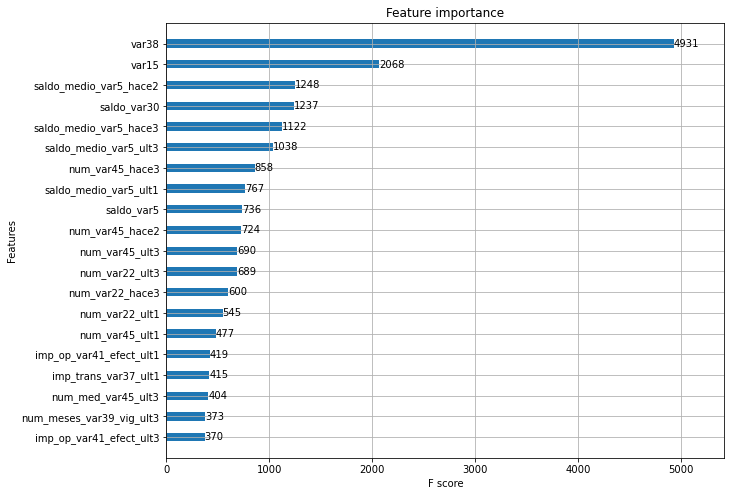

In [16]:
# 중요 피처 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [17]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train,y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.795963	valid_0's binary_logloss: 0.159288
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.801789	valid_0's binary_logloss: 0.155038
[3]	valid_0's auc: 0.803367	valid_0's binary_logloss: 0.15185
[4]	valid_0's auc: 0.805168	valid_0's binary_logloss: 0.14961
[5]	valid_0's auc: 0.809401	valid_0's binary_logloss: 0.147695
[6]	valid_0's auc: 0.810671	valid_0's binary_logloss: 0.146234
[7]	valid_0's auc: 0.815356	valid_0's binary_logloss: 0.144877
[8]	valid_0's auc: 0.816777	valid_0's binary_logloss: 0.143783
[9]	valid_0's auc: 0.817821	valid_0's binary_logloss: 0.143084
[10]	valid_0's auc: 0.818637	valid_0's binary_logloss: 0.142272
[11]	valid_0's auc: 0.81939	valid_0's binary_logloss: 0.141623
[12]	valid_0's auc: 0.821106	valid_0's binary_logloss: 0.141043
[13]	valid_0's auc: 0.822008	valid_0's binary_logloss: 0.140628
[14]	valid_0's auc: 0.822584	valid_0's binary_logloss: 0.140198
[15]	valid_0's auc: 0.822291	valid_0's binary_logloss:

ROC AUC: 0.8239


In [18]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32, 63],
          'max_depth':[128,160],
          'min_child_samples':[60,100],
          'subsample':[0.8,1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.823013	valid_0's binary_logloss: 0.157599	valid_1's auc: 0.790743	valid_1's binary_logloss: 0.15957
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.152021	valid_1's auc: 0.798206	valid_1's binary_logloss: 0.154936
[3]	valid_0's auc: 0.834698	valid_0's binary_logloss: 0.147938	valid_1's auc: 0.80092	valid_1's binary_logloss: 0.151855
[4]	valid_0's auc: 0.841455	valid_0's binary_logloss: 0.144894	valid_1's auc: 0.806721	valid_1's binary_logloss: 0.149519
[5]	valid_0's auc: 0.844597	valid_0's binary_logloss: 0.142358	valid_1's auc: 0.811474	valid_1's binary_logloss: 0.14748
[6]	valid_0's auc: 0.846611	valid_0's binary_logloss: 0.140293	valid_1's auc: 0.814162	valid_1's binary_logloss: 0.145994
[7]	valid_0's auc: 0.848839	valid_0's binary_logloss: 0.138494	valid_1's auc: 0.813779	valid_1's binary_logloss: 0.144725
[8]	valid_0's auc: 0.850756	valid_0's binary_logloss: 0.137034	valid_1's auc: 0.81531	va

[24]	valid_0's auc: 0.871862	valid_0's binary_logloss: 0.126124	valid_1's auc: 0.823007	valid_1's binary_logloss: 0.138268
[25]	valid_0's auc: 0.872545	valid_0's binary_logloss: 0.125781	valid_1's auc: 0.822522	valid_1's binary_logloss: 0.138267
[26]	valid_0's auc: 0.873282	valid_0's binary_logloss: 0.125454	valid_1's auc: 0.823012	valid_1's binary_logloss: 0.138188
[27]	valid_0's auc: 0.874465	valid_0's binary_logloss: 0.125089	valid_1's auc: 0.822886	valid_1's binary_logloss: 0.138154
[28]	valid_0's auc: 0.875329	valid_0's binary_logloss: 0.124775	valid_1's auc: 0.822981	valid_1's binary_logloss: 0.138096
[29]	valid_0's auc: 0.876242	valid_0's binary_logloss: 0.124489	valid_1's auc: 0.823528	valid_1's binary_logloss: 0.138005
[30]	valid_0's auc: 0.877086	valid_0's binary_logloss: 0.124216	valid_1's auc: 0.823302	valid_1's binary_logloss: 0.13801
[31]	valid_0's auc: 0.878482	valid_0's binary_logloss: 0.123905	valid_1's auc: 0.82384	valid_1's binary_logloss: 0.137933
[32]	valid_0's auc

[44]	valid_0's auc: 0.884488	valid_0's binary_logloss: 0.121227	valid_1's auc: 0.820992	valid_1's binary_logloss: 0.138554
[45]	valid_0's auc: 0.884936	valid_0's binary_logloss: 0.121037	valid_1's auc: 0.820742	valid_1's binary_logloss: 0.138624
[46]	valid_0's auc: 0.885461	valid_0's binary_logloss: 0.120816	valid_1's auc: 0.82058	valid_1's binary_logloss: 0.138693
[47]	valid_0's auc: 0.885979	valid_0's binary_logloss: 0.12061	valid_1's auc: 0.820619	valid_1's binary_logloss: 0.1387
[48]	valid_0's auc: 0.886302	valid_0's binary_logloss: 0.120437	valid_1's auc: 0.819977	valid_1's binary_logloss: 0.138825
[49]	valid_0's auc: 0.886832	valid_0's binary_logloss: 0.120259	valid_1's auc: 0.820039	valid_1's binary_logloss: 0.138819
[50]	valid_0's auc: 0.887239	valid_0's binary_logloss: 0.120047	valid_1's auc: 0.819429	valid_1's binary_logloss: 0.138965
[51]	valid_0's auc: 0.887604	valid_0's binary_logloss: 0.119881	valid_1's auc: 0.819516	valid_1's binary_logloss: 0.138937
[52]	valid_0's auc: 

[1]	valid_0's auc: 0.826219	valid_0's binary_logloss: 0.157269	valid_1's auc: 0.791321	valid_1's binary_logloss: 0.159376
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.83513	valid_0's binary_logloss: 0.151735	valid_1's auc: 0.800708	valid_1's binary_logloss: 0.154958
[3]	valid_0's auc: 0.839359	valid_0's binary_logloss: 0.147875	valid_1's auc: 0.804371	valid_1's binary_logloss: 0.151858
[4]	valid_0's auc: 0.84563	valid_0's binary_logloss: 0.144803	valid_1's auc: 0.809964	valid_1's binary_logloss: 0.149442
[5]	valid_0's auc: 0.849047	valid_0's binary_logloss: 0.142298	valid_1's auc: 0.814331	valid_1's binary_logloss: 0.147418
[6]	valid_0's auc: 0.850358	valid_0's binary_logloss: 0.140174	valid_1's auc: 0.814746	valid_1's binary_logloss: 0.145763
[7]	valid_0's auc: 0.851861	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.815747	valid_1's binary_logloss: 0.144571
[8]	valid_0's auc: 0.853529	valid_0's binary_logloss: 0.136867	valid_1's auc: 0.815928	

[24]	valid_0's auc: 0.871185	valid_0's binary_logloss: 0.126329	valid_1's auc: 0.82139	valid_1's binary_logloss: 0.138648
[25]	valid_0's auc: 0.87194	valid_0's binary_logloss: 0.125991	valid_1's auc: 0.821976	valid_1's binary_logloss: 0.138573
[26]	valid_0's auc: 0.872982	valid_0's binary_logloss: 0.125689	valid_1's auc: 0.82185	valid_1's binary_logloss: 0.138552
[27]	valid_0's auc: 0.873987	valid_0's binary_logloss: 0.125323	valid_1's auc: 0.821624	valid_1's binary_logloss: 0.138552
[28]	valid_0's auc: 0.874673	valid_0's binary_logloss: 0.125016	valid_1's auc: 0.82192	valid_1's binary_logloss: 0.138382
[29]	valid_0's auc: 0.875169	valid_0's binary_logloss: 0.124772	valid_1's auc: 0.821861	valid_1's binary_logloss: 0.138411
[30]	valid_0's auc: 0.876107	valid_0's binary_logloss: 0.124439	valid_1's auc: 0.82198	valid_1's binary_logloss: 0.138415
[31]	valid_0's auc: 0.876827	valid_0's binary_logloss: 0.124192	valid_1's auc: 0.821411	valid_1's binary_logloss: 0.138492
[32]	valid_0's auc: 0

[32]	valid_0's auc: 0.895306	valid_0's binary_logloss: 0.117572	valid_1's auc: 0.819012	valid_1's binary_logloss: 0.139648
[33]	valid_0's auc: 0.896363	valid_0's binary_logloss: 0.117148	valid_1's auc: 0.818837	valid_1's binary_logloss: 0.139734
[34]	valid_0's auc: 0.897327	valid_0's binary_logloss: 0.116771	valid_1's auc: 0.818287	valid_1's binary_logloss: 0.139841
[35]	valid_0's auc: 0.898153	valid_0's binary_logloss: 0.116355	valid_1's auc: 0.818049	valid_1's binary_logloss: 0.139892
[36]	valid_0's auc: 0.898906	valid_0's binary_logloss: 0.115979	valid_1's auc: 0.818297	valid_1's binary_logloss: 0.139893
[37]	valid_0's auc: 0.899731	valid_0's binary_logloss: 0.115586	valid_1's auc: 0.818356	valid_1's binary_logloss: 0.139949
[38]	valid_0's auc: 0.900377	valid_0's binary_logloss: 0.115205	valid_1's auc: 0.818131	valid_1's binary_logloss: 0.140023
[39]	valid_0's auc: 0.901556	valid_0's binary_logloss: 0.114824	valid_1's auc: 0.818988	valid_1's binary_logloss: 0.139889
[40]	valid_0's a

[49]	valid_0's auc: 0.903818	valid_0's binary_logloss: 0.112545	valid_1's auc: 0.821882	valid_1's binary_logloss: 0.139278
[50]	valid_0's auc: 0.904033	valid_0's binary_logloss: 0.112344	valid_1's auc: 0.821429	valid_1's binary_logloss: 0.139394
[51]	valid_0's auc: 0.904336	valid_0's binary_logloss: 0.112075	valid_1's auc: 0.821146	valid_1's binary_logloss: 0.139537
[52]	valid_0's auc: 0.904734	valid_0's binary_logloss: 0.11189	valid_1's auc: 0.821692	valid_1's binary_logloss: 0.139465
[53]	valid_0's auc: 0.905002	valid_0's binary_logloss: 0.111651	valid_1's auc: 0.821388	valid_1's binary_logloss: 0.139596
[54]	valid_0's auc: 0.905373	valid_0's binary_logloss: 0.111383	valid_1's auc: 0.821042	valid_1's binary_logloss: 0.139762
[55]	valid_0's auc: 0.905849	valid_0's binary_logloss: 0.111125	valid_1's auc: 0.820756	valid_1's binary_logloss: 0.139893
[56]	valid_0's auc: 0.906001	valid_0's binary_logloss: 0.110927	valid_1's auc: 0.820522	valid_1's binary_logloss: 0.139983
[57]	valid_0's au

[1]	valid_0's auc: 0.831516	valid_0's binary_logloss: 0.156792	valid_1's auc: 0.793858	valid_1's binary_logloss: 0.159191
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843274	valid_0's binary_logloss: 0.150736	valid_1's auc: 0.804948	valid_1's binary_logloss: 0.154322
[3]	valid_0's auc: 0.846207	valid_0's binary_logloss: 0.146427	valid_1's auc: 0.806029	valid_1's binary_logloss: 0.151176
[4]	valid_0's auc: 0.853067	valid_0's binary_logloss: 0.143115	valid_1's auc: 0.811588	valid_1's binary_logloss: 0.148922
[5]	valid_0's auc: 0.855229	valid_0's binary_logloss: 0.140376	valid_1's auc: 0.813032	valid_1's binary_logloss: 0.147162
[6]	valid_0's auc: 0.856913	valid_0's binary_logloss: 0.138088	valid_1's auc: 0.814792	valid_1's binary_logloss: 0.145641
[7]	valid_0's auc: 0.859855	valid_0's binary_logloss: 0.136145	valid_1's auc: 0.816491	valid_1's binary_logloss: 0.144468
[8]	valid_0's auc: 0.861782	valid_0's binary_logloss: 0.134508	valid_1's auc: 0.81779

[19]	valid_0's auc: 0.879135	valid_0's binary_logloss: 0.124233	valid_1's auc: 0.822141	valid_1's binary_logloss: 0.138439
[20]	valid_0's auc: 0.880302	valid_0's binary_logloss: 0.123678	valid_1's auc: 0.822393	valid_1's binary_logloss: 0.138356
[21]	valid_0's auc: 0.881538	valid_0's binary_logloss: 0.123064	valid_1's auc: 0.822265	valid_1's binary_logloss: 0.138301
[22]	valid_0's auc: 0.882542	valid_0's binary_logloss: 0.12256	valid_1's auc: 0.822403	valid_1's binary_logloss: 0.138318
[23]	valid_0's auc: 0.883976	valid_0's binary_logloss: 0.121966	valid_1's auc: 0.821936	valid_1's binary_logloss: 0.138293
[24]	valid_0's auc: 0.884824	valid_0's binary_logloss: 0.121493	valid_1's auc: 0.822075	valid_1's binary_logloss: 0.138238
[25]	valid_0's auc: 0.885631	valid_0's binary_logloss: 0.121002	valid_1's auc: 0.822016	valid_1's binary_logloss: 0.138212
[26]	valid_0's auc: 0.88701	valid_0's binary_logloss: 0.120459	valid_1's auc: 0.821693	valid_1's binary_logloss: 0.138278
[27]	valid_0's auc

[33]	valid_0's auc: 0.893935	valid_0's binary_logloss: 0.117751	valid_1's auc: 0.819117	valid_1's binary_logloss: 0.13915
[34]	valid_0's auc: 0.895177	valid_0's binary_logloss: 0.117396	valid_1's auc: 0.819079	valid_1's binary_logloss: 0.139199
[35]	valid_0's auc: 0.895879	valid_0's binary_logloss: 0.117039	valid_1's auc: 0.817959	valid_1's binary_logloss: 0.139409
[36]	valid_0's auc: 0.896301	valid_0's binary_logloss: 0.11675	valid_1's auc: 0.817742	valid_1's binary_logloss: 0.1395
[37]	valid_0's auc: 0.897052	valid_0's binary_logloss: 0.116357	valid_1's auc: 0.817089	valid_1's binary_logloss: 0.139685
[38]	valid_0's auc: 0.897686	valid_0's binary_logloss: 0.116023	valid_1's auc: 0.817283	valid_1's binary_logloss: 0.139661
[39]	valid_0's auc: 0.898306	valid_0's binary_logloss: 0.115703	valid_1's auc: 0.816882	valid_1's binary_logloss: 0.139757
[40]	valid_0's auc: 0.898649	valid_0's binary_logloss: 0.115411	valid_1's auc: 0.816885	valid_1's binary_logloss: 0.139804
[41]	valid_0's auc: 

[40]	valid_0's auc: 0.881174	valid_0's binary_logloss: 0.122862	valid_1's auc: 0.822036	valid_1's binary_logloss: 0.138759
[41]	valid_0's auc: 0.881781	valid_0's binary_logloss: 0.122645	valid_1's auc: 0.822499	valid_1's binary_logloss: 0.138657
[42]	valid_0's auc: 0.882366	valid_0's binary_logloss: 0.122403	valid_1's auc: 0.822081	valid_1's binary_logloss: 0.138738
[43]	valid_0's auc: 0.882882	valid_0's binary_logloss: 0.122215	valid_1's auc: 0.821781	valid_1's binary_logloss: 0.138877
[44]	valid_0's auc: 0.883424	valid_0's binary_logloss: 0.121985	valid_1's auc: 0.821254	valid_1's binary_logloss: 0.138924
[45]	valid_0's auc: 0.883914	valid_0's binary_logloss: 0.121771	valid_1's auc: 0.821515	valid_1's binary_logloss: 0.138924
[46]	valid_0's auc: 0.884571	valid_0's binary_logloss: 0.121599	valid_1's auc: 0.821452	valid_1's binary_logloss: 0.138941
[47]	valid_0's auc: 0.884973	valid_0's binary_logloss: 0.121471	valid_1's auc: 0.82148	valid_1's binary_logloss: 0.138919
[48]	valid_0's au

[57]	valid_0's auc: 0.889649	valid_0's binary_logloss: 0.119428	valid_1's auc: 0.822703	valid_1's binary_logloss: 0.13838
[58]	valid_0's auc: 0.889931	valid_0's binary_logloss: 0.119267	valid_1's auc: 0.822757	valid_1's binary_logloss: 0.138385
[59]	valid_0's auc: 0.890316	valid_0's binary_logloss: 0.119117	valid_1's auc: 0.82302	valid_1's binary_logloss: 0.138356
[60]	valid_0's auc: 0.890685	valid_0's binary_logloss: 0.118974	valid_1's auc: 0.822561	valid_1's binary_logloss: 0.138453
[61]	valid_0's auc: 0.891014	valid_0's binary_logloss: 0.118826	valid_1's auc: 0.82222	valid_1's binary_logloss: 0.138551
[62]	valid_0's auc: 0.891243	valid_0's binary_logloss: 0.118684	valid_1's auc: 0.822028	valid_1's binary_logloss: 0.138605
[63]	valid_0's auc: 0.891424	valid_0's binary_logloss: 0.118572	valid_1's auc: 0.821899	valid_1's binary_logloss: 0.138652
[64]	valid_0's auc: 0.891581	valid_0's binary_logloss: 0.11846	valid_1's auc: 0.821738	valid_1's binary_logloss: 0.138698
[65]	valid_0's auc: 

[61]	valid_0's auc: 0.88939	valid_0's binary_logloss: 0.119263	valid_1's auc: 0.818039	valid_1's binary_logloss: 0.139504
[62]	valid_0's auc: 0.889688	valid_0's binary_logloss: 0.119095	valid_1's auc: 0.817919	valid_1's binary_logloss: 0.139549
[63]	valid_0's auc: 0.890083	valid_0's binary_logloss: 0.118917	valid_1's auc: 0.817607	valid_1's binary_logloss: 0.139619
Early stopping, best iteration is:
[33]	valid_0's auc: 0.876281	valid_0's binary_logloss: 0.124653	valid_1's auc: 0.821839	valid_1's binary_logloss: 0.138301
[1]	valid_0's auc: 0.824362	valid_0's binary_logloss: 0.157758	valid_1's auc: 0.787152	valid_1's binary_logloss: 0.159467
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829552	valid_0's binary_logloss: 0.152271	valid_1's auc: 0.797756	valid_1's binary_logloss: 0.154985
[3]	valid_0's auc: 0.837507	valid_0's binary_logloss: 0.14827	valid_1's auc: 0.802566	valid_1's binary_logloss: 0.151981
[4]	valid_0's auc: 0.843221	valid_0's binary_log

[18]	valid_0's auc: 0.863548	valid_0's binary_logloss: 0.129359	valid_1's auc: 0.822243	valid_1's binary_logloss: 0.138398
[19]	valid_0's auc: 0.865094	valid_0's binary_logloss: 0.12885	valid_1's auc: 0.821918	valid_1's binary_logloss: 0.138311
[20]	valid_0's auc: 0.866837	valid_0's binary_logloss: 0.128362	valid_1's auc: 0.822799	valid_1's binary_logloss: 0.138233
[21]	valid_0's auc: 0.867458	valid_0's binary_logloss: 0.127963	valid_1's auc: 0.823175	valid_1's binary_logloss: 0.138099
[22]	valid_0's auc: 0.868369	valid_0's binary_logloss: 0.127597	valid_1's auc: 0.823256	valid_1's binary_logloss: 0.138002
[23]	valid_0's auc: 0.869161	valid_0's binary_logloss: 0.12722	valid_1's auc: 0.823001	valid_1's binary_logloss: 0.137914
[24]	valid_0's auc: 0.870364	valid_0's binary_logloss: 0.126833	valid_1's auc: 0.822803	valid_1's binary_logloss: 0.137904
[25]	valid_0's auc: 0.870932	valid_0's binary_logloss: 0.126533	valid_1's auc: 0.822828	valid_1's binary_logloss: 0.137815
[26]	valid_0's auc

[23]	valid_0's auc: 0.868163	valid_0's binary_logloss: 0.127644	valid_1's auc: 0.820251	valid_1's binary_logloss: 0.138632
[24]	valid_0's auc: 0.868962	valid_0's binary_logloss: 0.127315	valid_1's auc: 0.820447	valid_1's binary_logloss: 0.138563
[25]	valid_0's auc: 0.869646	valid_0's binary_logloss: 0.127001	valid_1's auc: 0.820553	valid_1's binary_logloss: 0.138507
[26]	valid_0's auc: 0.870797	valid_0's binary_logloss: 0.126659	valid_1's auc: 0.820989	valid_1's binary_logloss: 0.138437
[27]	valid_0's auc: 0.871457	valid_0's binary_logloss: 0.126338	valid_1's auc: 0.821377	valid_1's binary_logloss: 0.138383
[28]	valid_0's auc: 0.872137	valid_0's binary_logloss: 0.126044	valid_1's auc: 0.821067	valid_1's binary_logloss: 0.138385
[29]	valid_0's auc: 0.873028	valid_0's binary_logloss: 0.125697	valid_1's auc: 0.821329	valid_1's binary_logloss: 0.138377
[30]	valid_0's auc: 0.873693	valid_0's binary_logloss: 0.12544	valid_1's auc: 0.821766	valid_1's binary_logloss: 0.138316
[31]	valid_0's au

[33]	valid_0's auc: 0.892513	valid_0's binary_logloss: 0.118747	valid_1's auc: 0.820026	valid_1's binary_logloss: 0.139372
[34]	valid_0's auc: 0.893321	valid_0's binary_logloss: 0.118353	valid_1's auc: 0.82006	valid_1's binary_logloss: 0.139365
[35]	valid_0's auc: 0.894311	valid_0's binary_logloss: 0.117983	valid_1's auc: 0.819505	valid_1's binary_logloss: 0.139483
[36]	valid_0's auc: 0.895095	valid_0's binary_logloss: 0.11761	valid_1's auc: 0.819217	valid_1's binary_logloss: 0.139577
[37]	valid_0's auc: 0.896034	valid_0's binary_logloss: 0.117263	valid_1's auc: 0.8196	valid_1's binary_logloss: 0.139568
[38]	valid_0's auc: 0.896856	valid_0's binary_logloss: 0.116873	valid_1's auc: 0.819226	valid_1's binary_logloss: 0.139674
[39]	valid_0's auc: 0.897263	valid_0's binary_logloss: 0.116602	valid_1's auc: 0.819321	valid_1's binary_logloss: 0.139735
[40]	valid_0's auc: 0.897853	valid_0's binary_logloss: 0.116238	valid_1's auc: 0.819374	valid_1's binary_logloss: 0.139704
[41]	valid_0's auc: 

[44]	valid_0's auc: 0.899545	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.823206	valid_1's binary_logloss: 0.138431
[45]	valid_0's auc: 0.900094	valid_0's binary_logloss: 0.115222	valid_1's auc: 0.822573	valid_1's binary_logloss: 0.138561
[46]	valid_0's auc: 0.900517	valid_0's binary_logloss: 0.114944	valid_1's auc: 0.822249	valid_1's binary_logloss: 0.138688
[47]	valid_0's auc: 0.900899	valid_0's binary_logloss: 0.114679	valid_1's auc: 0.822566	valid_1's binary_logloss: 0.138658
[48]	valid_0's auc: 0.901451	valid_0's binary_logloss: 0.114396	valid_1's auc: 0.822343	valid_1's binary_logloss: 0.138741
[49]	valid_0's auc: 0.901748	valid_0's binary_logloss: 0.114118	valid_1's auc: 0.822087	valid_1's binary_logloss: 0.138866
[50]	valid_0's auc: 0.902034	valid_0's binary_logloss: 0.113896	valid_1's auc: 0.822039	valid_1's binary_logloss: 0.138935
[51]	valid_0's auc: 0.902485	valid_0's binary_logloss: 0.113654	valid_1's auc: 0.822262	valid_1's binary_logloss: 0.138967
[52]	valid_0's a

[1]	valid_0's auc: 0.834103	valid_0's binary_logloss: 0.157112	valid_1's auc: 0.791023	valid_1's binary_logloss: 0.159287
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839252	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.797304	valid_1's binary_logloss: 0.154762
[3]	valid_0's auc: 0.849249	valid_0's binary_logloss: 0.147011	valid_1's auc: 0.80858	valid_1's binary_logloss: 0.151519
[4]	valid_0's auc: 0.853355	valid_0's binary_logloss: 0.143707	valid_1's auc: 0.810567	valid_1's binary_logloss: 0.14918
[5]	valid_0's auc: 0.857168	valid_0's binary_logloss: 0.141026	valid_1's auc: 0.813319	valid_1's binary_logloss: 0.147333
[6]	valid_0's auc: 0.858877	valid_0's binary_logloss: 0.13882	valid_1's auc: 0.815028	valid_1's binary_logloss: 0.145764
[7]	valid_0's auc: 0.860354	valid_0's binary_logloss: 0.136886	valid_1's auc: 0.814699	valid_1's binary_logloss: 0.144565
[8]	valid_0's auc: 0.861787	valid_0's binary_logloss: 0.135311	valid_1's auc: 0.814984	v

[17]	valid_0's auc: 0.876149	valid_0's binary_logloss: 0.126499	valid_1's auc: 0.82138	valid_1's binary_logloss: 0.13855
[18]	valid_0's auc: 0.877014	valid_0's binary_logloss: 0.125898	valid_1's auc: 0.821412	valid_1's binary_logloss: 0.138338
[19]	valid_0's auc: 0.878111	valid_0's binary_logloss: 0.125307	valid_1's auc: 0.821645	valid_1's binary_logloss: 0.138168
[20]	valid_0's auc: 0.879027	valid_0's binary_logloss: 0.124749	valid_1's auc: 0.821325	valid_1's binary_logloss: 0.138113
[21]	valid_0's auc: 0.880151	valid_0's binary_logloss: 0.124179	valid_1's auc: 0.821125	valid_1's binary_logloss: 0.138085
[22]	valid_0's auc: 0.881426	valid_0's binary_logloss: 0.123624	valid_1's auc: 0.821896	valid_1's binary_logloss: 0.137957
[23]	valid_0's auc: 0.882252	valid_0's binary_logloss: 0.123163	valid_1's auc: 0.821851	valid_1's binary_logloss: 0.137955
[24]	valid_0's auc: 0.884169	valid_0's binary_logloss: 0.122611	valid_1's auc: 0.822127	valid_1's binary_logloss: 0.137932
[25]	valid_0's auc

[18]	valid_0's auc: 0.877115	valid_0's binary_logloss: 0.126085	valid_1's auc: 0.818701	valid_1's binary_logloss: 0.13944
[19]	valid_0's auc: 0.878697	valid_0's binary_logloss: 0.125434	valid_1's auc: 0.818385	valid_1's binary_logloss: 0.139353
[20]	valid_0's auc: 0.879706	valid_0's binary_logloss: 0.12485	valid_1's auc: 0.818613	valid_1's binary_logloss: 0.139235
[21]	valid_0's auc: 0.880531	valid_0's binary_logloss: 0.124376	valid_1's auc: 0.817729	valid_1's binary_logloss: 0.139326
[22]	valid_0's auc: 0.882047	valid_0's binary_logloss: 0.123787	valid_1's auc: 0.817795	valid_1's binary_logloss: 0.139324
[23]	valid_0's auc: 0.883264	valid_0's binary_logloss: 0.123293	valid_1's auc: 0.817955	valid_1's binary_logloss: 0.139299
[24]	valid_0's auc: 0.884048	valid_0's binary_logloss: 0.122829	valid_1's auc: 0.817743	valid_1's binary_logloss: 0.139261
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.122344	valid_1's auc: 0.817977	valid_1's binary_logloss: 0.139246
[26]	valid_0's auc

[39]	valid_0's auc: 0.883054	valid_0's binary_logloss: 0.122148	valid_1's auc: 0.819987	valid_1's binary_logloss: 0.139185
[40]	valid_0's auc: 0.883851	valid_0's binary_logloss: 0.121946	valid_1's auc: 0.819983	valid_1's binary_logloss: 0.139204
[41]	valid_0's auc: 0.884348	valid_0's binary_logloss: 0.121699	valid_1's auc: 0.819815	valid_1's binary_logloss: 0.139238
[42]	valid_0's auc: 0.884688	valid_0's binary_logloss: 0.121497	valid_1's auc: 0.819101	valid_1's binary_logloss: 0.139345
[43]	valid_0's auc: 0.885323	valid_0's binary_logloss: 0.121222	valid_1's auc: 0.818855	valid_1's binary_logloss: 0.139434
[44]	valid_0's auc: 0.885622	valid_0's binary_logloss: 0.121029	valid_1's auc: 0.818769	valid_1's binary_logloss: 0.139461
[45]	valid_0's auc: 0.886346	valid_0's binary_logloss: 0.120864	valid_1's auc: 0.818407	valid_1's binary_logloss: 0.139501
[46]	valid_0's auc: 0.886832	valid_0's binary_logloss: 0.120653	valid_1's auc: 0.818336	valid_1's binary_logloss: 0.139506
[47]	valid_0's a

[50]	valid_0's auc: 0.88848	valid_0's binary_logloss: 0.119592	valid_1's auc: 0.820996	valid_1's binary_logloss: 0.13879
[51]	valid_0's auc: 0.888937	valid_0's binary_logloss: 0.119451	valid_1's auc: 0.820918	valid_1's binary_logloss: 0.138796
[52]	valid_0's auc: 0.889331	valid_0's binary_logloss: 0.119284	valid_1's auc: 0.820531	valid_1's binary_logloss: 0.138875
[53]	valid_0's auc: 0.889722	valid_0's binary_logloss: 0.11912	valid_1's auc: 0.820317	valid_1's binary_logloss: 0.138968
[54]	valid_0's auc: 0.889904	valid_0's binary_logloss: 0.119013	valid_1's auc: 0.820093	valid_1's binary_logloss: 0.139016
[55]	valid_0's auc: 0.890475	valid_0's binary_logloss: 0.118774	valid_1's auc: 0.819901	valid_1's binary_logloss: 0.139058
[56]	valid_0's auc: 0.890924	valid_0's binary_logloss: 0.118599	valid_1's auc: 0.820015	valid_1's binary_logloss: 0.139055
[57]	valid_0's auc: 0.8913	valid_0's binary_logloss: 0.118443	valid_1's auc: 0.81963	valid_1's binary_logloss: 0.139102
[58]	valid_0's auc: 0.

[54]	valid_0's auc: 0.889117	valid_0's binary_logloss: 0.119253	valid_1's auc: 0.818977	valid_1's binary_logloss: 0.139112
[55]	valid_0's auc: 0.889414	valid_0's binary_logloss: 0.119084	valid_1's auc: 0.819065	valid_1's binary_logloss: 0.139129
[56]	valid_0's auc: 0.889806	valid_0's binary_logloss: 0.118912	valid_1's auc: 0.819115	valid_1's binary_logloss: 0.139166
[57]	valid_0's auc: 0.89002	valid_0's binary_logloss: 0.118761	valid_1's auc: 0.818963	valid_1's binary_logloss: 0.139207
[58]	valid_0's auc: 0.890352	valid_0's binary_logloss: 0.118578	valid_1's auc: 0.81836	valid_1's binary_logloss: 0.139338
Early stopping, best iteration is:
[28]	valid_0's auc: 0.874673	valid_0's binary_logloss: 0.125016	valid_1's auc: 0.82192	valid_1's binary_logloss: 0.138382
[1]	valid_0's auc: 0.823013	valid_0's binary_logloss: 0.157599	valid_1's auc: 0.790743	valid_1's binary_logloss: 0.15957
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829436	valid_0's binary_log

[1]	valid_0's auc: 0.826219	valid_0's binary_logloss: 0.157269	valid_1's auc: 0.791321	valid_1's binary_logloss: 0.159376
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.83513	valid_0's binary_logloss: 0.151735	valid_1's auc: 0.800708	valid_1's binary_logloss: 0.154958
[3]	valid_0's auc: 0.839359	valid_0's binary_logloss: 0.147875	valid_1's auc: 0.804371	valid_1's binary_logloss: 0.151858
[4]	valid_0's auc: 0.84563	valid_0's binary_logloss: 0.144803	valid_1's auc: 0.809964	valid_1's binary_logloss: 0.149442
[5]	valid_0's auc: 0.849047	valid_0's binary_logloss: 0.142298	valid_1's auc: 0.814331	valid_1's binary_logloss: 0.147418
[6]	valid_0's auc: 0.850358	valid_0's binary_logloss: 0.140174	valid_1's auc: 0.814746	valid_1's binary_logloss: 0.145763
[7]	valid_0's auc: 0.851861	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.815747	valid_1's binary_logloss: 0.144571
[8]	valid_0's auc: 0.853529	valid_0's binary_logloss: 0.136867	valid_1's auc: 0.815928	

[21]	valid_0's auc: 0.86804	valid_0's binary_logloss: 0.127603	valid_1's auc: 0.820245	valid_1's binary_logloss: 0.138973
[22]	valid_0's auc: 0.868469	valid_0's binary_logloss: 0.1272	valid_1's auc: 0.820691	valid_1's binary_logloss: 0.138853
[23]	valid_0's auc: 0.869757	valid_0's binary_logloss: 0.126771	valid_1's auc: 0.820877	valid_1's binary_logloss: 0.138743
[24]	valid_0's auc: 0.871185	valid_0's binary_logloss: 0.126329	valid_1's auc: 0.82139	valid_1's binary_logloss: 0.138648
[25]	valid_0's auc: 0.87194	valid_0's binary_logloss: 0.125991	valid_1's auc: 0.821976	valid_1's binary_logloss: 0.138573
[26]	valid_0's auc: 0.872982	valid_0's binary_logloss: 0.125689	valid_1's auc: 0.82185	valid_1's binary_logloss: 0.138552
[27]	valid_0's auc: 0.873987	valid_0's binary_logloss: 0.125323	valid_1's auc: 0.821624	valid_1's binary_logloss: 0.138552
[28]	valid_0's auc: 0.874673	valid_0's binary_logloss: 0.125016	valid_1's auc: 0.82192	valid_1's binary_logloss: 0.138382
[29]	valid_0's auc: 0.8

[29]	valid_0's auc: 0.892336	valid_0's binary_logloss: 0.118754	valid_1's auc: 0.820395	valid_1's binary_logloss: 0.139388
[30]	valid_0's auc: 0.893396	valid_0's binary_logloss: 0.118317	valid_1's auc: 0.819739	valid_1's binary_logloss: 0.139508
[31]	valid_0's auc: 0.894407	valid_0's binary_logloss: 0.117916	valid_1's auc: 0.818907	valid_1's binary_logloss: 0.139602
[32]	valid_0's auc: 0.895306	valid_0's binary_logloss: 0.117572	valid_1's auc: 0.819012	valid_1's binary_logloss: 0.139648
[33]	valid_0's auc: 0.896363	valid_0's binary_logloss: 0.117148	valid_1's auc: 0.818837	valid_1's binary_logloss: 0.139734
[34]	valid_0's auc: 0.897327	valid_0's binary_logloss: 0.116771	valid_1's auc: 0.818287	valid_1's binary_logloss: 0.139841
[35]	valid_0's auc: 0.898153	valid_0's binary_logloss: 0.116355	valid_1's auc: 0.818049	valid_1's binary_logloss: 0.139892
[36]	valid_0's auc: 0.898906	valid_0's binary_logloss: 0.115979	valid_1's auc: 0.818297	valid_1's binary_logloss: 0.139893
[37]	valid_0's a

[43]	valid_0's auc: 0.901562	valid_0's binary_logloss: 0.114132	valid_1's auc: 0.822503	valid_1's binary_logloss: 0.138932
[44]	valid_0's auc: 0.902078	valid_0's binary_logloss: 0.11385	valid_1's auc: 0.822535	valid_1's binary_logloss: 0.138968
[45]	valid_0's auc: 0.90235	valid_0's binary_logloss: 0.113592	valid_1's auc: 0.822543	valid_1's binary_logloss: 0.13897
[46]	valid_0's auc: 0.902668	valid_0's binary_logloss: 0.113358	valid_1's auc: 0.822352	valid_1's binary_logloss: 0.139074
[47]	valid_0's auc: 0.902931	valid_0's binary_logloss: 0.113124	valid_1's auc: 0.822375	valid_1's binary_logloss: 0.139138
[48]	valid_0's auc: 0.903354	valid_0's binary_logloss: 0.112859	valid_1's auc: 0.822068	valid_1's binary_logloss: 0.139219
[49]	valid_0's auc: 0.903818	valid_0's binary_logloss: 0.112545	valid_1's auc: 0.821882	valid_1's binary_logloss: 0.139278
[50]	valid_0's auc: 0.904033	valid_0's binary_logloss: 0.112344	valid_1's auc: 0.821429	valid_1's binary_logloss: 0.139394
[51]	valid_0's auc:

[56]	valid_0's auc: 0.906497	valid_0's binary_logloss: 0.111093	valid_1's auc: 0.812957	valid_1's binary_logloss: 0.141428
[57]	valid_0's auc: 0.907124	valid_0's binary_logloss: 0.110835	valid_1's auc: 0.813113	valid_1's binary_logloss: 0.141476
[58]	valid_0's auc: 0.907508	valid_0's binary_logloss: 0.110578	valid_1's auc: 0.812712	valid_1's binary_logloss: 0.141619
[59]	valid_0's auc: 0.907779	valid_0's binary_logloss: 0.110361	valid_1's auc: 0.812396	valid_1's binary_logloss: 0.14172
Early stopping, best iteration is:
[29]	valid_0's auc: 0.890466	valid_0's binary_logloss: 0.119288	valid_1's auc: 0.819347	valid_1's binary_logloss: 0.139024
[1]	valid_0's auc: 0.831516	valid_0's binary_logloss: 0.156792	valid_1's auc: 0.793858	valid_1's binary_logloss: 0.159191
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843274	valid_0's binary_logloss: 0.150736	valid_1's auc: 0.804948	valid_1's binary_logloss: 0.154322
[3]	valid_0's auc: 0.846207	valid_0's binary_l

[17]	valid_0's auc: 0.876942	valid_0's binary_logloss: 0.12556	valid_1's auc: 0.822074	valid_1's binary_logloss: 0.138667
[18]	valid_0's auc: 0.878414	valid_0's binary_logloss: 0.124828	valid_1's auc: 0.822012	valid_1's binary_logloss: 0.13855
[19]	valid_0's auc: 0.879135	valid_0's binary_logloss: 0.124233	valid_1's auc: 0.822141	valid_1's binary_logloss: 0.138439
[20]	valid_0's auc: 0.880302	valid_0's binary_logloss: 0.123678	valid_1's auc: 0.822393	valid_1's binary_logloss: 0.138356
[21]	valid_0's auc: 0.881538	valid_0's binary_logloss: 0.123064	valid_1's auc: 0.822265	valid_1's binary_logloss: 0.138301
[22]	valid_0's auc: 0.882542	valid_0's binary_logloss: 0.12256	valid_1's auc: 0.822403	valid_1's binary_logloss: 0.138318
[23]	valid_0's auc: 0.883976	valid_0's binary_logloss: 0.121966	valid_1's auc: 0.821936	valid_1's binary_logloss: 0.138293
[24]	valid_0's auc: 0.884824	valid_0's binary_logloss: 0.121493	valid_1's auc: 0.822075	valid_1's binary_logloss: 0.138238
[25]	valid_0's auc:

[29]	valid_0's auc: 0.890466	valid_0's binary_logloss: 0.119288	valid_1's auc: 0.819347	valid_1's binary_logloss: 0.139024
[30]	valid_0's auc: 0.891302	valid_0's binary_logloss: 0.11889	valid_1's auc: 0.81933	valid_1's binary_logloss: 0.139045
[31]	valid_0's auc: 0.892288	valid_0's binary_logloss: 0.118519	valid_1's auc: 0.819495	valid_1's binary_logloss: 0.139091
[32]	valid_0's auc: 0.893157	valid_0's binary_logloss: 0.118125	valid_1's auc: 0.819749	valid_1's binary_logloss: 0.139069
[33]	valid_0's auc: 0.893935	valid_0's binary_logloss: 0.117751	valid_1's auc: 0.819117	valid_1's binary_logloss: 0.13915
[34]	valid_0's auc: 0.895177	valid_0's binary_logloss: 0.117396	valid_1's auc: 0.819079	valid_1's binary_logloss: 0.139199
[35]	valid_0's auc: 0.895879	valid_0's binary_logloss: 0.117039	valid_1's auc: 0.817959	valid_1's binary_logloss: 0.139409
[36]	valid_0's auc: 0.896301	valid_0's binary_logloss: 0.11675	valid_1's auc: 0.817742	valid_1's binary_logloss: 0.1395
[37]	valid_0's auc: 0.

[50]	valid_0's auc: 0.886579	valid_0's binary_logloss: 0.120833	valid_1's auc: 0.821583	valid_1's binary_logloss: 0.139043
[51]	valid_0's auc: 0.886823	valid_0's binary_logloss: 0.12069	valid_1's auc: 0.821655	valid_1's binary_logloss: 0.139077
[52]	valid_0's auc: 0.88711	valid_0's binary_logloss: 0.120533	valid_1's auc: 0.821565	valid_1's binary_logloss: 0.139125
[53]	valid_0's auc: 0.887553	valid_0's binary_logloss: 0.120303	valid_1's auc: 0.821437	valid_1's binary_logloss: 0.139197
[54]	valid_0's auc: 0.887887	valid_0's binary_logloss: 0.120147	valid_1's auc: 0.821147	valid_1's binary_logloss: 0.139252
[55]	valid_0's auc: 0.888149	valid_0's binary_logloss: 0.12	valid_1's auc: 0.820801	valid_1's binary_logloss: 0.139279
[56]	valid_0's auc: 0.888457	valid_0's binary_logloss: 0.119856	valid_1's auc: 0.820388	valid_1's binary_logloss: 0.139357
[57]	valid_0's auc: 0.888746	valid_0's binary_logloss: 0.119702	valid_1's auc: 0.820026	valid_1's binary_logloss: 0.139448
[58]	valid_0's auc: 0.

[65]	valid_0's auc: 0.892029	valid_0's binary_logloss: 0.118308	valid_1's auc: 0.821705	valid_1's binary_logloss: 0.138723
[66]	valid_0's auc: 0.892146	valid_0's binary_logloss: 0.118208	valid_1's auc: 0.82158	valid_1's binary_logloss: 0.138774
Early stopping, best iteration is:
[36]	valid_0's auc: 0.879347	valid_0's binary_logloss: 0.123564	valid_1's auc: 0.824899	valid_1's binary_logloss: 0.137514
[1]	valid_0's auc: 0.829373	valid_0's binary_logloss: 0.157768	valid_1's auc: 0.802426	valid_1's binary_logloss: 0.159012
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.836268	valid_0's binary_logloss: 0.152227	valid_1's auc: 0.805059	valid_1's binary_logloss: 0.154486
[3]	valid_0's auc: 0.839622	valid_0's binary_logloss: 0.14822	valid_1's auc: 0.809643	valid_1's binary_logloss: 0.151282
[4]	valid_0's auc: 0.842719	valid_0's binary_logloss: 0.145203	valid_1's auc: 0.812488	valid_1's binary_logloss: 0.148896
[5]	valid_0's auc: 0.846151	valid_0's binary_logl

[1]	valid_0's auc: 0.824362	valid_0's binary_logloss: 0.157758	valid_1's auc: 0.787152	valid_1's binary_logloss: 0.159467
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829552	valid_0's binary_logloss: 0.152271	valid_1's auc: 0.797756	valid_1's binary_logloss: 0.154985
[3]	valid_0's auc: 0.837507	valid_0's binary_logloss: 0.14827	valid_1's auc: 0.802566	valid_1's binary_logloss: 0.151981
[4]	valid_0's auc: 0.843221	valid_0's binary_logloss: 0.145195	valid_1's auc: 0.809399	valid_1's binary_logloss: 0.149683
[5]	valid_0's auc: 0.846632	valid_0's binary_logloss: 0.142757	valid_1's auc: 0.813434	valid_1's binary_logloss: 0.147789
[6]	valid_0's auc: 0.848575	valid_0's binary_logloss: 0.140638	valid_1's auc: 0.814545	valid_1's binary_logloss: 0.146186
[7]	valid_0's auc: 0.850242	valid_0's binary_logloss: 0.138852	valid_1's auc: 0.814581	valid_1's binary_logloss: 0.144942
[8]	valid_0's auc: 0.851092	valid_0's binary_logloss: 0.137408	valid_1's auc: 0.814884

[21]	valid_0's auc: 0.867458	valid_0's binary_logloss: 0.127963	valid_1's auc: 0.823175	valid_1's binary_logloss: 0.138099
[22]	valid_0's auc: 0.868369	valid_0's binary_logloss: 0.127597	valid_1's auc: 0.823256	valid_1's binary_logloss: 0.138002
[23]	valid_0's auc: 0.869161	valid_0's binary_logloss: 0.12722	valid_1's auc: 0.823001	valid_1's binary_logloss: 0.137914
[24]	valid_0's auc: 0.870364	valid_0's binary_logloss: 0.126833	valid_1's auc: 0.822803	valid_1's binary_logloss: 0.137904
[25]	valid_0's auc: 0.870932	valid_0's binary_logloss: 0.126533	valid_1's auc: 0.822828	valid_1's binary_logloss: 0.137815
[26]	valid_0's auc: 0.871793	valid_0's binary_logloss: 0.126203	valid_1's auc: 0.822877	valid_1's binary_logloss: 0.137792
[27]	valid_0's auc: 0.872442	valid_0's binary_logloss: 0.125898	valid_1's auc: 0.822576	valid_1's binary_logloss: 0.137749
[28]	valid_0's auc: 0.873579	valid_0's binary_logloss: 0.125607	valid_1's auc: 0.823076	valid_1's binary_logloss: 0.137664
[29]	valid_0's au

[23]	valid_0's auc: 0.868163	valid_0's binary_logloss: 0.127644	valid_1's auc: 0.820251	valid_1's binary_logloss: 0.138632
[24]	valid_0's auc: 0.868962	valid_0's binary_logloss: 0.127315	valid_1's auc: 0.820447	valid_1's binary_logloss: 0.138563
[25]	valid_0's auc: 0.869646	valid_0's binary_logloss: 0.127001	valid_1's auc: 0.820553	valid_1's binary_logloss: 0.138507
[26]	valid_0's auc: 0.870797	valid_0's binary_logloss: 0.126659	valid_1's auc: 0.820989	valid_1's binary_logloss: 0.138437
[27]	valid_0's auc: 0.871457	valid_0's binary_logloss: 0.126338	valid_1's auc: 0.821377	valid_1's binary_logloss: 0.138383
[28]	valid_0's auc: 0.872137	valid_0's binary_logloss: 0.126044	valid_1's auc: 0.821067	valid_1's binary_logloss: 0.138385
[29]	valid_0's auc: 0.873028	valid_0's binary_logloss: 0.125697	valid_1's auc: 0.821329	valid_1's binary_logloss: 0.138377
[30]	valid_0's auc: 0.873693	valid_0's binary_logloss: 0.12544	valid_1's auc: 0.821766	valid_1's binary_logloss: 0.138316
[31]	valid_0's au

[31]	valid_0's auc: 0.890705	valid_0's binary_logloss: 0.119517	valid_1's auc: 0.819464	valid_1's binary_logloss: 0.139435
[32]	valid_0's auc: 0.891785	valid_0's binary_logloss: 0.119093	valid_1's auc: 0.819851	valid_1's binary_logloss: 0.139396
[33]	valid_0's auc: 0.892513	valid_0's binary_logloss: 0.118747	valid_1's auc: 0.820026	valid_1's binary_logloss: 0.139372
[34]	valid_0's auc: 0.893321	valid_0's binary_logloss: 0.118353	valid_1's auc: 0.82006	valid_1's binary_logloss: 0.139365
[35]	valid_0's auc: 0.894311	valid_0's binary_logloss: 0.117983	valid_1's auc: 0.819505	valid_1's binary_logloss: 0.139483
[36]	valid_0's auc: 0.895095	valid_0's binary_logloss: 0.11761	valid_1's auc: 0.819217	valid_1's binary_logloss: 0.139577
[37]	valid_0's auc: 0.896034	valid_0's binary_logloss: 0.117263	valid_1's auc: 0.8196	valid_1's binary_logloss: 0.139568
[38]	valid_0's auc: 0.896856	valid_0's binary_logloss: 0.116873	valid_1's auc: 0.819226	valid_1's binary_logloss: 0.139674
[39]	valid_0's auc: 

[44]	valid_0's auc: 0.899545	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.823206	valid_1's binary_logloss: 0.138431
[45]	valid_0's auc: 0.900094	valid_0's binary_logloss: 0.115222	valid_1's auc: 0.822573	valid_1's binary_logloss: 0.138561
[46]	valid_0's auc: 0.900517	valid_0's binary_logloss: 0.114944	valid_1's auc: 0.822249	valid_1's binary_logloss: 0.138688
[47]	valid_0's auc: 0.900899	valid_0's binary_logloss: 0.114679	valid_1's auc: 0.822566	valid_1's binary_logloss: 0.138658
[48]	valid_0's auc: 0.901451	valid_0's binary_logloss: 0.114396	valid_1's auc: 0.822343	valid_1's binary_logloss: 0.138741
[49]	valid_0's auc: 0.901748	valid_0's binary_logloss: 0.114118	valid_1's auc: 0.822087	valid_1's binary_logloss: 0.138866
[50]	valid_0's auc: 0.902034	valid_0's binary_logloss: 0.113896	valid_1's auc: 0.822039	valid_1's binary_logloss: 0.138935
[51]	valid_0's auc: 0.902485	valid_0's binary_logloss: 0.113654	valid_1's auc: 0.822262	valid_1's binary_logloss: 0.138967
[52]	valid_0's a

[1]	valid_0's auc: 0.834103	valid_0's binary_logloss: 0.157112	valid_1's auc: 0.791023	valid_1's binary_logloss: 0.159287
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839252	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.797304	valid_1's binary_logloss: 0.154762
[3]	valid_0's auc: 0.849249	valid_0's binary_logloss: 0.147011	valid_1's auc: 0.80858	valid_1's binary_logloss: 0.151519
[4]	valid_0's auc: 0.853355	valid_0's binary_logloss: 0.143707	valid_1's auc: 0.810567	valid_1's binary_logloss: 0.14918
[5]	valid_0's auc: 0.857168	valid_0's binary_logloss: 0.141026	valid_1's auc: 0.813319	valid_1's binary_logloss: 0.147333
[6]	valid_0's auc: 0.858877	valid_0's binary_logloss: 0.13882	valid_1's auc: 0.815028	valid_1's binary_logloss: 0.145764
[7]	valid_0's auc: 0.860354	valid_0's binary_logloss: 0.136886	valid_1's auc: 0.814699	valid_1's binary_logloss: 0.144565
[8]	valid_0's auc: 0.861787	valid_0's binary_logloss: 0.135311	valid_1's auc: 0.814984	v

[16]	valid_0's auc: 0.874713	valid_0's binary_logloss: 0.127173	valid_1's auc: 0.820981	valid_1's binary_logloss: 0.13876
[17]	valid_0's auc: 0.876149	valid_0's binary_logloss: 0.126499	valid_1's auc: 0.82138	valid_1's binary_logloss: 0.13855
[18]	valid_0's auc: 0.877014	valid_0's binary_logloss: 0.125898	valid_1's auc: 0.821412	valid_1's binary_logloss: 0.138338
[19]	valid_0's auc: 0.878111	valid_0's binary_logloss: 0.125307	valid_1's auc: 0.821645	valid_1's binary_logloss: 0.138168
[20]	valid_0's auc: 0.879027	valid_0's binary_logloss: 0.124749	valid_1's auc: 0.821325	valid_1's binary_logloss: 0.138113
[21]	valid_0's auc: 0.880151	valid_0's binary_logloss: 0.124179	valid_1's auc: 0.821125	valid_1's binary_logloss: 0.138085
[22]	valid_0's auc: 0.881426	valid_0's binary_logloss: 0.123624	valid_1's auc: 0.821896	valid_1's binary_logloss: 0.137957
[23]	valid_0's auc: 0.882252	valid_0's binary_logloss: 0.123163	valid_1's auc: 0.821851	valid_1's binary_logloss: 0.137955
[24]	valid_0's auc:

[18]	valid_0's auc: 0.877115	valid_0's binary_logloss: 0.126085	valid_1's auc: 0.818701	valid_1's binary_logloss: 0.13944
[19]	valid_0's auc: 0.878697	valid_0's binary_logloss: 0.125434	valid_1's auc: 0.818385	valid_1's binary_logloss: 0.139353
[20]	valid_0's auc: 0.879706	valid_0's binary_logloss: 0.12485	valid_1's auc: 0.818613	valid_1's binary_logloss: 0.139235
[21]	valid_0's auc: 0.880531	valid_0's binary_logloss: 0.124376	valid_1's auc: 0.817729	valid_1's binary_logloss: 0.139326
[22]	valid_0's auc: 0.882047	valid_0's binary_logloss: 0.123787	valid_1's auc: 0.817795	valid_1's binary_logloss: 0.139324
[23]	valid_0's auc: 0.883264	valid_0's binary_logloss: 0.123293	valid_1's auc: 0.817955	valid_1's binary_logloss: 0.139299
[24]	valid_0's auc: 0.884048	valid_0's binary_logloss: 0.122829	valid_1's auc: 0.817743	valid_1's binary_logloss: 0.139261
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.122344	valid_1's auc: 0.817977	valid_1's binary_logloss: 0.139246
[26]	valid_0's auc

[43]	training's auc: 0.920843	training's binary_logloss: 0.109673	valid_1's auc: 0.823156	valid_1's binary_logloss: 0.138301
[44]	training's auc: 0.921462	training's binary_logloss: 0.109288	valid_1's auc: 0.822914	valid_1's binary_logloss: 0.138389
[45]	training's auc: 0.922635	training's binary_logloss: 0.108934	valid_1's auc: 0.822994	valid_1's binary_logloss: 0.138391
[46]	training's auc: 0.923563	training's binary_logloss: 0.108518	valid_1's auc: 0.822787	valid_1's binary_logloss: 0.138475
[47]	training's auc: 0.924384	training's binary_logloss: 0.108179	valid_1's auc: 0.822691	valid_1's binary_logloss: 0.138517
[48]	training's auc: 0.924945	training's binary_logloss: 0.107809	valid_1's auc: 0.822618	valid_1's binary_logloss: 0.138529
[49]	training's auc: 0.925526	training's binary_logloss: 0.107453	valid_1's auc: 0.822563	valid_1's binary_logloss: 0.13855
[50]	training's auc: 0.926421	training's binary_logloss: 0.1071	valid_1's auc: 0.822235	valid_1's binary_logloss: 0.138685
[51

In [19]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100, max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.796283	valid_0's binary_logloss: 0.159424
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.803289	valid_0's binary_logloss: 0.154921
[3]	valid_0's auc: 0.807301	valid_0's binary_logloss: 0.1518
[4]	valid_0's auc: 0.811102	valid_0's binary_logloss: 0.149384
[5]	valid_0's auc: 0.817613	valid_0's binary_logloss: 0.147338
[6]	valid_0's auc: 0.819807	valid_0's binary_logloss: 0.145735
[7]	valid_0's auc: 0.820399	valid_0's binary_logloss: 0.1445
[8]	valid_0's auc: 0.820003	valid_0's binary_logloss: 0.143404
[9]	valid_0's auc: 0.821257	valid_0's binary_logloss: 0.142464
[10]	valid_0's auc: 0.820964	valid_0's binary_logloss: 0.141718
[11]	valid_0's auc: 0.821671	valid_0's binary_logloss: 0.14109
[12]	valid_0's auc: 0.822687	valid_0's binary_logloss: 0.140595
[13]	valid_0's auc: 0.822748	valid_0's binary_logloss: 0.140177
[14]	valid_0's auc: 0.823109	valid_0's binary_logloss: 0.139739
[15]	

In [20]:
# 절대적 성능은 XGBoost가 더 높게 나타난다

In [21]:
print(cust_df['TARGET'].value_counts())
unsatifsfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
print(card_df.columns)
print(card_df.Class.value_counts())
card_df.head(3)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
0    284315
1       492
Name: Class, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [23]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [24]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:,-1]
    # train_test_split()으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [25]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [26]:
# 로지스틱 회귀 학습 및 예측

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [27]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

# 3장에서 사용한 get_clf_eval()함수를 이용하여 평가 수행
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85282    13]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8750, 재현율: 0.6149,    F1: 0.7222, AUC:0.9570


In [28]:
# LightGBM 학습 및 예측

# 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [29]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


In [37]:
# LigtGBM이 높은 성능을 보여주고 있지만 성능 보완(특히 재현율)이 필요하다

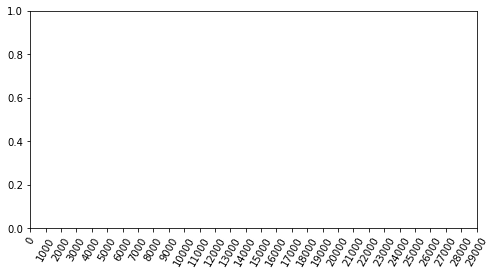

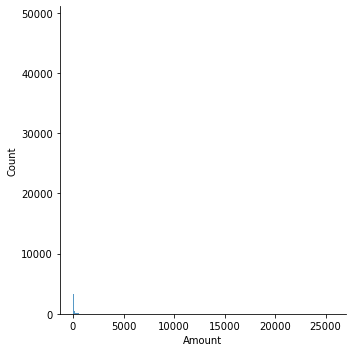

In [41]:
# Amouont는 심한 불균형 분포
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.displot(card_df['Amount'])

In [32]:
# 로그 변환 후 성능
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p()를 이용하여 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [40]:
X_train, x_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796


<AxesSubplot:ylabel='Density'>

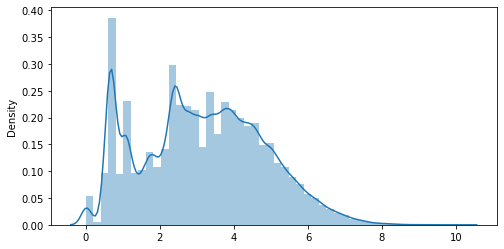

In [39]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.distplot(np.log1p(card_df['Amount'].values.reshape(-1,1)))

In [42]:
# 스케일링 후 성능
from sklearn.preprocessing import StandardScaler
#사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame 맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [43]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jbs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
[LightGBM] [Warning] Unknown parameter: n_jbs
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.9779


<AxesSubplot:>

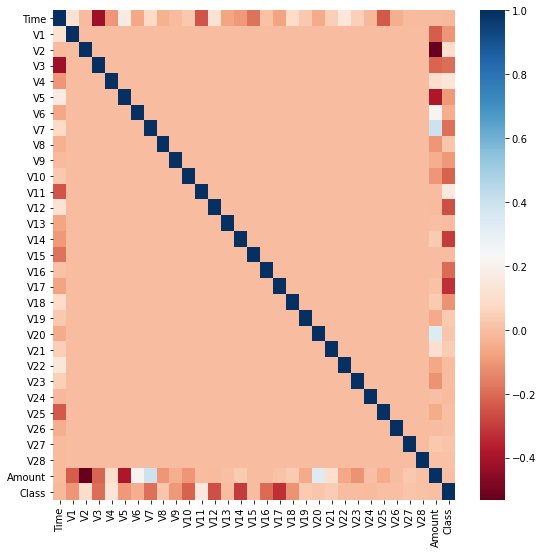

In [46]:
# 이상치 데이터(Outlier) : 전체 데이터 패턴과 비교했을 때 차이가 많이 나느 이상 값

import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [49]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraoud에 해당하는 column 데이터만 추출, 1/4분위와 3/4분위 지점을 np.percentile로 구한다
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점을 구한다
    iqr = quantile_75, - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값보다 크거나, 최소값보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [50]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

TypeError: can't multiply sequence by non-int of type 'float'